# General Information On What You Can Expect To Learn From This Program
The goal of this program was to give students a way to interact with data that is taken from data bases using python. Python is one of the most used programming languages today. It is majorly favoured by the computer science community and generally anyone that deals with data sets. 

Through using this program you will learn about the basics of using python and interacting with data sets. 

# Importing modules
## General Information About Modules
Importing modules is the way python code access extra code that is not usable by default. This is usefull as it allows for extra code to be easily accessed in the current file without manually copying all of the relevent classes and functions into the file.

## The Modules Used In This File
The modules used here are:

- json
- numpy
- pandas
- seaborn
- datagraph

These modules are essentailly what allows the code to create graphs and interact with the data.


## Extra Information For The Curious
talk about runtime vs other times

The modules available in python can be inbuilt, shipped with the default python installation, or an external module that a third party has made. By default some modules are automatically imported, and this is what allow you to run functions like 'print()'.  The 'import' compiler directive that essentially tells the compiler to add the code that is in the module to the top of the code.

If you want to look at the documentation for the modules used in this program click on the following links.

- https://numpy.org/
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://seaborn.pydata.org/
- https://docs.python.org/3/library/json.html
- ####add a link to where i host my documentation later####


In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json, re
import seaborn as sns

from datagraph import Categorical, Other

from platform import python_version
print(python_version())


3.9.7


# Reading JSON Files
## Understanding Datasets

One of the most important steps when first looking at a dataset is understanding what the numbers represent or how information is represented. You need to know if the data is stored as numerical or as a group of letters (Strings). If this step is not done data may not be read in correctly. It can also lead to unimportant data being analised and the conslusions made useless.

e.g If you analise a random set of numbers and find out what the mean and standard deviation are without knowing what those numbers represent that information is basically useless. While you may now know the characteristics of the data if you don't know how that translates in the real world what was the point of doing the analysis in the first place.

In our case the numbers can represent many things including:

- Your Gender
- How Old You Are
- Which Number Option You Chose To A Multichoice Question
- Any Many More


## Getting This Information
A common way that this informatiom is stored on websites is in JSON files. The JSON files we are reading 'sleep.jsonc' esentailly contains all of the all of the information that was used to create the sleep questionair that you have filled out.

Under the code cell bellow you will see two different outputs. The two groups shown below, surounded by curly brackets {}, contain what is know as a dictionary of all of the questions and fields in the sleep.jsonc file. You will notice that each small section of data first has a group of characters (Strings) contained in 'single quotation marks' and then has a collon : with data following that. The first group surounded by, ' ', with a question mark at the end is the question and the second part after the collon, :, is what fields the data will be in.

e.g In the small exert bellow 'What is your gender' is the question asked and ['Male', 'Female', 'Non-binary' and 'Prefer not to say'] are the possible otions the user can select. 'How often do I go to bed and worry about things happening at home or at school?' is again the question with ['Never', 'Once in a while', 'Sometimes', 'Quite often', 'Frequently if not always', 'Always'] being the possible choices in the quiz.

> {'What is your gender?': ['Male', 'Female', 'Non-binary', 'Prefer not to say'], ..., 'How often do I go to bed and worry about things happening at home or at school?': ['Never', 'Once in a while', 'Sometimes', 'Quite often', 'Frequently if not always', 'Always']} 

It is important that you can fild exactly how the questions are written as you will need this to access the surveys' data later. 

## If The Above Is Too Complicated
Essentially all you need to know to interact with the data is how to find exactly what each questions are in the survey. This is simply the sections of text that that are surounded by, ' ', and have a question mark at the end. If you have problems with this you can ask a teacher for help.

## What Does The Code Bellow Do?
The code bellow reds in the JSON file and extracts the questions from it.

## What Is Printed Bellow The Code?
The Two Groups of data printed bellow the code contain all of the questions in the survey. The first group of text is all of the categorical graph questions and labels that are stored in the sleep.jsonc file. The second group of text shows all of the non-categorical question data. 

# Reading in Survey Questions

In [2]:
# https://stackoverflow.com/questions/46317639/how-can-i-handle-reading-a-json-file-in-it-that-has-comments-with-python/46317842
# https://docs.python.org/3/tutorial/inputoutput.html

with open('sleep.jsonc', 'r') as f:
    s = f.read()
s = str(s)

jsonObject = json.loads(re.sub("//.*","",s,flags=re.MULTILINE))
# print(jsonObject)

# print(jsonObject['questions'])
categorical_labels = {}
other_labels = {}

for i in jsonObject['questions']:
    try: 
        # print(f' {i["text"]}: {i["values"]}')
        if isinstance(i["values"][0], dict): #Deal with categorical numberical data
            tlist = []
            for j in i["values"]:
                tlist.append(j["label"])
            categorical_labels[i["text"]] = tlist
        else:   #Deal with Other data
            categorical_labels[i["text"]] = i["values"]
    except:
        other_labels[i["text"]] = i["type"]
        pass
#Want the Values column for each question if it exists
print(categorical_labels)
print(len(categorical_labels))
print(f"\n\n{other_labels}")
print(len(other_labels))


{'What is your gender?': ['Male', 'Female', 'Non-binary', 'Prefer not to say'], 'During your daytime activities, how much of a problem do you have with sleepiness?': ['No problem at all', 'A little problem', 'More than a little problem', 'A big problem', 'A very big problem'], 'What is the main reason you go to bed at this time on weekdays?': ['My parent / carer has set my bedtime', 'I feel sleepy', 'I finish my homework', 'My TV shows are over', 'My brother or sister go to bed', 'I finish socialising', 'I get home from my job', 'Other'], 'What is the main reason you wake up at this time on weekdays?': ['Noises or my pet wakes me up', 'My alarm clock wakes me up', 'My parent/carer or another family member wakes me up', 'I need to go to the bathroom', 'I donâ€™t know, I just wake up', 'Other'], 'How would you rate the quality of your sleep?': ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good'], 'What external factors influenced how well you slept last night?': ['Family/people disturbance

# Reading In The Survey Data From The CSV File

## What Are CSV Files
CSV, Comma-Separated-Values files are a common file type that is used to store data. Each seperate piece of data is seperated by a comma.

## What Does The Code Bellow Do
The code bellow uses a module called pandas to read all of the files from the surveydata.csv file. This data is stored in a variable called s_data.
Bellow the code you can see that data that is being imported in a chart. The question titles can be seen in bold at the top of the chart.


In [3]:
s_data = pd.read_csv('surveydata.csv')
s_data


,Timestamp,In which country are you currently located?,In which city are you currently located?,How old are you?,What is your gender?,"During your daytime activities, how much of a problem do you have with sleepiness?",What time do you try to go to sleep?,What is the main reason you go to bed at this time on weekdays?,How long does it take you to fall asleep?,What time do you wake up?,...,How many hours did you study/do homework?,How often have you arrived late to class because you overslept?,"Currently, what are your grades in school mostly?","If you compare yourself to other people your age, how would you describe your health?",How often do I go to bed and think about things I need to do?,How often do I go to bed and replay the day’s events over and over in my mind?,How often do I check my clock several times during the night?,"During the 1 hour before bedtime, how often do things happen that make me feel strong emotions?",How often do I go to bed feeling upset?,How often do I go to bed and worry about things happening at home or at school?
0,01/06/2021 07:24:37,Australia,Perth,29,NaN,2,22.0,I get home from my job,45,6.0,...,50.0,Never,A’s and B’s,3.0,3.0,2.0,2.0,2.0,1.0,2.0
1,07/06/2021 23:33:43,Australia,Perth,43,Female,0,22.0,I feel sleepy,10,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/06/2021 07:49:50,Australia,Perth,28,Male,1,23.0,I feel sleepy,15,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/06/2021 08:12:38,Australia,Perth,28,Male,1,23.0,I feel sleepy,15,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08/06/2021 08:14:37,Australia,perth,40,Female,1,22.5,Other,20,6.5,...,20.0,Never,A’s and B’s,2.0,4.0,4.0,4.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,26/11/2021 04:20:27,Australia,Perth,16,Male,0,10.5,I feel sleepy,10,6.0,...,NaN,NaN,NaN,3.0,2.0,2.0,0.0,0.0,1.0,3.0
711,26/11/2021 04:24:09,Australia,Perth,16,Female,0,22.0,I feel sleepy,20,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,26/11/2021 04:27:42,India,pune,24,Non-binary,4,4.5,My parent / carer has set my bedtime,2,5.0,...,0.0,Everyday,D’s and F’s,4.0,0.0,5.0,5.0,5.0,5.0,0.0
713,26/11/2021 04:48:08,Australia,wa,16,Female,2,22.5,I get home from my job,30,6.5,...,4.0,Once,B’s and C’s,2.0,3.0,3.0,2.0,3.0,3.0,3.0


# Accessing And Manipulating Data
All of the data will now be accessed by using the *s_data* variable. This is where knowing the exact questions asked in the survey is important. To acess the data contained in columns of the data above you need to use the following code: s_data['question'], where question in the question that you want the data from. 
> e.g
>
> data = s_data['In which city are you currently located?']
>
> data = s_data['How old are you?']

In the following two blocks you can see what this looks like. Feel free to change the question text contained in the [] bellow to see what other field of data look like. 

In [4]:
data = s_data['In which city are you currently located?']
data

0      Perth
1      Perth
2      Perth
3      Perth
4      perth
       ...  
710    Perth
711    Perth
712     pune
713       wa
714    perth
Name: In which city are you currently located?, Length: 715, dtype: object

In [5]:
data = s_data['How old are you?']
data

0      29
1      43
2      28
3      28
4      40
       ..
710    16
711    16
712    24
713    16
714    16
Name: How old are you?, Length: 715, dtype: int64

# Changing The Data Into The Required Format For Graphing

Currently the data is in the wrong data type for it to be graphed using the methods in the datagraph module. Another Problem you might come across is some data may contain Nan values. This is the module numpys' way of saying their was no data entered. To get rid of these nan values and change the data into the format we want we need to run 

> data.dropna().to_numpy().tolist()


In [6]:
m_data = data.dropna().to_numpy().tolist()
m_data[-9:]

[15, 12, 34, 11, 16, 16, 24, 16, 16]

# Graphing Your First Data Set
## What Are Functions, Arguments And Keyword Arguments

Each of the methods used in both the Graph and the Categorical Class require the entering of data by keyword arguments. Keyword arguments are values that are passed into methods by name. e.g In the following piece of code *data* is the keyword and *frequency* is the passed argument. To find information about any module the first place you should check is the documentation. This small exert of the documentation shows the default keyword arguments for the Categorical object.

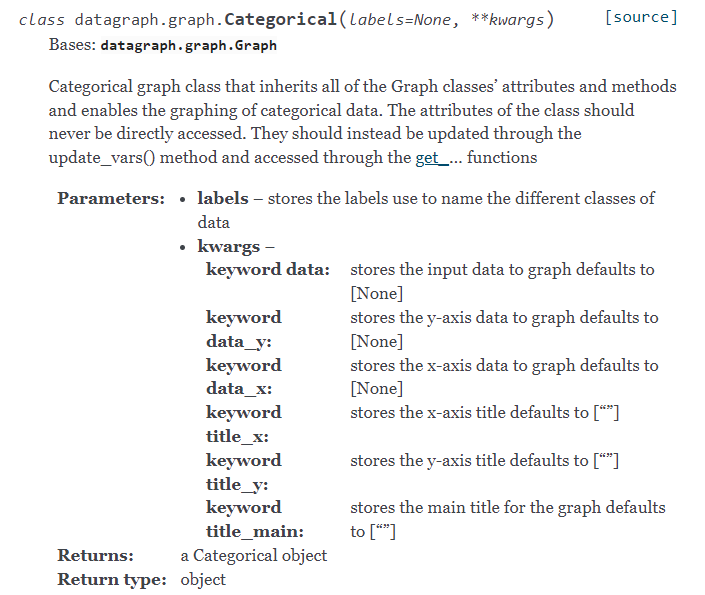

If you have any questions about how to use the datagraph module you should check the documentation. 
The datagraph module has two main classes that you will be interacting with are *Categorical* and *Other*. The Categorical class allows you to produce categorical graphs. Likewise, the Other class allows the generation of all the other types of graph the datagraph module has. Bellow this block an example of how to produce each type of graph is shown.

# Graphing a barchart
As always the first step when using a function that you dont know how to use is looking it up in the documentation.
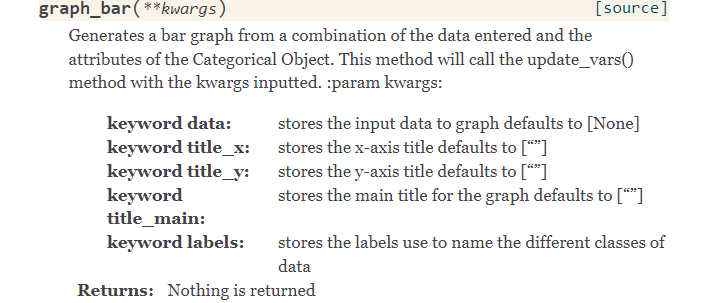

All of the other graph methods will have a documentation page that looks similar to this one. The variable names that you are to use follow ***keyword:***. 

E.g **keyword:** data 
- used to change the data in the graph. This can be done trough the graph method by using it as a keyword argument. e.g c.graph_bar(data=[]). 

In [7]:
#Step 1 Localise the data
title_data = 'If you compare yourself to other people your age, how would you describe your health?' # "How rested or refreshed do you feel when you wake up for the day?"
data_bar = s_data[title_data] #Note When Using How - usualy categorical data from 1-5, what is usaully some other type
frequency = data_bar.value_counts(sort=False).sort_index(ascending=True).dropna().to_numpy().tolist() #Extracts the frequncy of responses per category
ypos =  np.arange(len(frequency)) #Automatically assigns indexs for each number in the data

print(type(frequency))
c = Categorical(data=frequency, title_main=title_data, labels=categorical_labels[title_data], title_x = "Amount", title_y="Criteria")

c.graph_bar()
c.graph_pie()
temp = s_data[title_data].dropna().to_numpy().tolist() #Need to make this a function

temp[:30]
g = Categorical(data=temp[:30])
g.graph_bar()

<class 'list'>
Handling Error, get_data
Checking Data!
Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Handling Error, get_data
Checking Data!
Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …


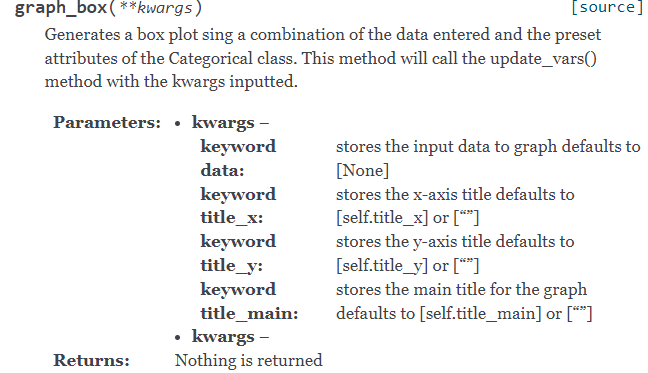

In [8]:
oth = Other(title_main=title_data, data=frequency, data_x=frequency, data_y=s_data['If you compare yourself to other people your age, how would you describe your health?'].value_counts(sort=False).sort_index(ascending=True).dropna().to_numpy().tolist())
oth.graph_box()

Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

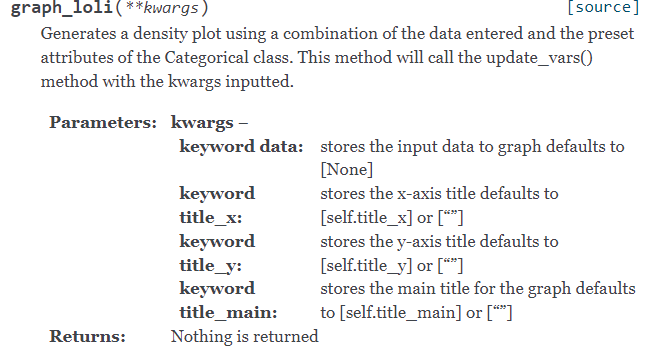

In [9]:
oth.graph_loli()

Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

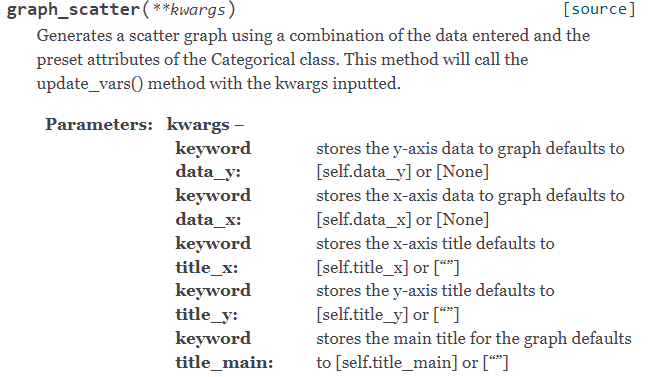

In [10]:
oth.graph_scatter()

Handling Error, get_data_x
Checking Data!
Handling Error, get_data_y
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

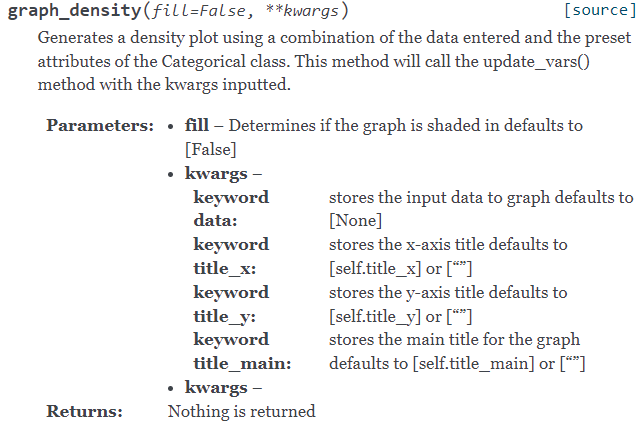

In [11]:
oth.graph_density()
oth.graph_density(fill=True)

Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

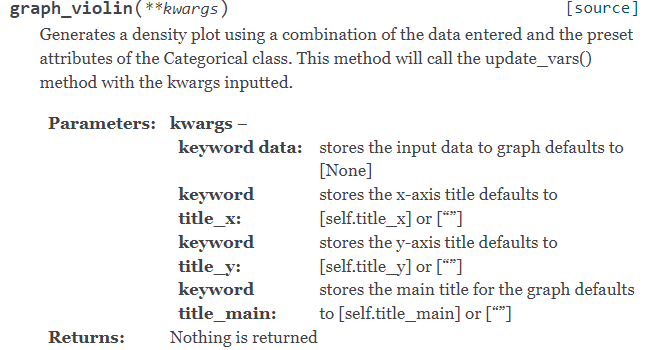

In [12]:
oth.graph_violin()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Handling Error, get_data
Checking Data!


# Common Errors

## Attribute Error
**AttributeError:** 'Categorical' object has no attribute '<text>'
This error simply means how have misspelt the method name you have attached after the object you have created.
Can you see the error in this next piece of code?


In [13]:
c.graph_ba(data=[1, 2, 3, 4], title_main="This is a test for reassignment")

AttributeError: 'Categorical' object has no attribute 'graph_ba'

### The Error is:
The Error is that 'c.graph_ba' should be 'c.graph_bar'

## Value Error (FixedLocator)
**Value Error:** The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).
This error ussually occurs when the number of labels does not match the size of the data set used. In the case below we have 5 pieces of data and only 4 labels.

In [14]:
print(c.get_data())
print(c.get_labels())

print("\n\n"
"Example\n")
c.graph_bar(data=[1, 2, 3, 4, 5], title_main="This is a test for reassignment")

Handling Error, get_data
Checking Data!
[13.62530413625304, 28.710462287104622, 38.929440389294406, 18.734793187347933]
['Poor', 'Fair', 'Good', 'Excellent']


Example

Handling Error, get_data
Checking Data!
Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Exception in graph_bar
Traceback (most recent call last):
  File "C:\Users\Aidan\OneDrive\Learning\Pawsey Intern\Final Code Output\datagraph\errorHandling.py", line 55, in inner_func
    return handler(self, *args, **kwargs)  # Call the function:
  File "C:\Users\Aidan\OneDrive\Learning\Pawsey Intern\Final Code Output\datagraph\graph.py", line 260, in graph_bar
    ax.set_yticklabels(labels)
  File "C:\Users\Aidan\anaconda3\envs\testing\lib\site-packages\matplotlib\axes\_base.py", line 75, in wrapper
    return get_method(self)(*args, **kwargs)
  File "C:\Users\Aidan\anaconda3\envs\testing\lib\site-packages\matplotlib\axis.py", line 1798, in _set_ticklabels
    return self.set_ticklabels(labels, minor=minor, **kwargs)
  File "C:\Users\Aidan\anaconda3\envs\testing\lib\site-packages\matplotlib\axis.py", line 1720, in set_ticklabels
    raise ValueError(
ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).


Error: Something Went Wrong in executing graph_bar. Please check if you have recieved any warnings and adjust the code to suit. 
##############FULL ERROR##############


The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).
##############END ERROR##############


End Handelling



# If You Get An Error That Is Not Covered Above
Copy the last line of the error in red into the web browser and go the website like stack overflow. You should be able to find an answer there.

# Things That Dont Cause Errors But Can Cause Interesting Results
## Entering Num Integer Data into the data attribute

In [15]:
c.graph_bar(data=['One', 'Two', 'Three', 'Four'])

Handling Error, get_data
Checking Data!
Handling Error, get_data
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Handling Error, get_data_x
Checking Data!
Handling Error, get_data_y
Checking Data!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …